https://www.youtube.com/watch?v=wu9IH1Xvdd4

The ‘Fashion-MNIST’ data set contains 60K gray-scaled images of labeled fashion categories from Zalando articles. It is also used to benchmark machine learning algorithms for image classification.

https://www.kaggle.com/zalando-research/fashionmnist/notebooks

In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
data = keras.datasets.fashion_mnist

In [6]:
# loading and looking at data
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [24]:
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


In [17]:
# initialize the label names
class_names = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

NameError: ignored

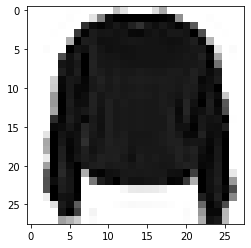

In [10]:
# explore data
plt.imshow(train_images[7], cmap=plt.cm.binary) #BN 28x28

In [11]:
print(train_images[7])

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

In [12]:
# shrink data down within 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

In [15]:
print(train_images[7])

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039216 0.

In [18]:
# flattening the data -> remove 28 interior arrays representing rows of pixels
# so we get a list of 28*28 = 784 values that will be the input of NN
# 784 input neurons
# output will be composed by 10 neurons representing all the 0-9 different labels
# hidden layer suggested is about 20% of the input size
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')                       
])
# softmax will pick values for each neuron and sum up to 1
# activated output neuron will be the one with the higher probability

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
model.fit(train_images, train_labels,
          epochs = 5) # NN will see the same images 5 times

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.8960
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2701 - accuracy: 0.8990
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9034
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2487 - accuracy: 0.9065
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2395 - accuracy: 0.9106


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Tested Accuracy: {test_acc}, Test Loss: {test_loss}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8823
Tested Accuracy: 0.8823000192642212, Test Loss: 0.3325739800930023


In [27]:
model.fit(train_images, train_labels,
          epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2321 - accuracy: 0.9123
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2238 - accuracy: 0.9164
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2186 - accuracy: 0.9176
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2111 - accuracy: 0.9212
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2038 - accuracy: 0.9232
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1995 - accuracy: 0.9247
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1936 - accuracy: 0.9272
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1897 - accuracy: 0.9280
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1838 - accuracy: 0.9307
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.177

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Tested Accuracy: {test_acc}, Test Loss: {test_loss}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3737 - accuracy: 0.8809
Tested Accuracy: 0.8809000253677368, Test Loss: 0.37367892265319824


In [30]:
preds = model.predict(test_images)
print(preds)
# we get as output a list of 10 different values for each image tested

[[3.62991720e-10 5.08604335e-13 5.33239772e-12 ... 3.25255300e-04
  4.14947671e-13 9.99565065e-01]
 [2.69632437e-05 8.41966962e-17 9.99105990e-01 ... 3.93029508e-17
  2.89929539e-13 3.17855805e-15]
 [1.22301507e-18 1.00000000e+00 1.57894743e-19 ... 3.15837820e-38
  2.36587252e-19 3.90752745e-28]
 ...
 [1.16503166e-07 4.92448269e-15 9.08964015e-09 ... 1.97813745e-11
  9.99992251e-01 3.78488147e-19]
 [1.21121131e-13 1.00000000e+00 1.25992602e-14 ... 1.39296453e-19
  2.08319768e-11 2.78775775e-16]
 [3.78059127e-07 1.05789258e-11 5.86782051e-07 ... 4.02443606e-04
  5.58077008e-05 9.94160274e-08]]


In [31]:
print(preds[0])

[3.6299172e-10 5.0860433e-13 5.3323977e-12 6.1208975e-18 7.9279345e-15
 1.0966009e-04 6.7273243e-11 3.2525530e-04 4.1494767e-13 9.9956506e-01]


In [35]:
print(class_names[np.argmax(preds[0])])

ankle boot


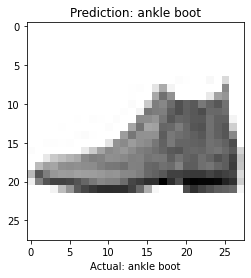

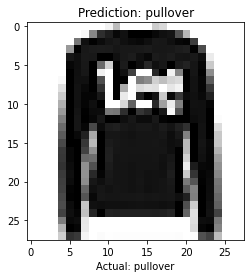

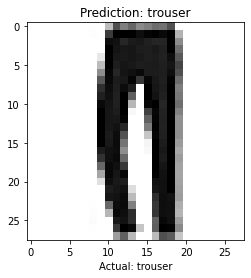

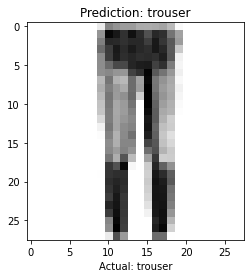

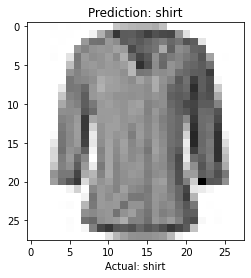

In [41]:
# show the preds
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel('Actual: '+ str(class_names[test_labels[i]]))
    plt.title('Prediction: ' + class_names[np.argmax(preds[i])])
    plt.show()